In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #just to make our visualization prettier ;-) 
import math
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("C:/Users/15514/Downloads/202006-citibike-tripdata-NEW.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882273 entries, 0 to 1882272
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 215.4+ MB


Check the missing value and drop the missing value

In [ ]:
df.isna().sum()
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,is_roundtrip,distance
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,32,False,3.802252
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,23,False,2.871175
5,355,2020-06-01 00:00:22.6500,2020-06-01 00:06:18.5250,248,Laight St & Hudson St,40.721854,-74.007718,247,Perry St & Bleecker St,40.735354,-74.004831,39594,Subscriber,1990,1,30,False,1.520738
7,1810,2020-06-01 00:00:27.5880,2020-06-01 00:30:38.2560,3263,Cooper Square & Astor Pl,40.729515,-73.990753,496,E 16 St & 5 Ave,40.737262,-73.992390,16571,Customer,1995,2,25,False,0.872390
8,87,2020-06-01 00:00:48.8500,2020-06-01 00:02:16.0190,390,Duffield St & Willoughby St,40.692216,-73.984284,3232,Bond St & Fulton St,40.689622,-73.983043,28205,Subscriber,1971,2,49,False,0.306852


In [ ]:
df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)

Generate new variable age for data cleaning as well as new feature for data modeling later

In [ ]:
df['age'] = 2020 - df['birth year'] 

data cleaning: records with age larger than 69, ‘tripduration’ with larger than 2490s, which are outliers, were removed from the dataset. In addition, records with gender value equals to 0(unknown) and birth year equals to 1969 were also removed because they are regarded as missing value(gender unknown—no gender information; 1969—system default year due to lack of information). Only records with is_roundtrip equals to 0(is not roundtrip) were kept for this question. 

In [ ]:
df.drop(df[df['tripduration']>2490].index , inplace=True)

In [ ]:
df.drop(df[df['age']>69].index , inplace=True)
df.drop(df[df['gender']==0].index , inplace=True)
df.drop(df[df['birth year']==1969].index , inplace=True)
df['is_roundtrip'] = df['start station id'] == df['end station id']
df['distance'] = 6371.01 * np.arccos(
    np.sin(np.radians(df['start station latitude'])) * np.sin(np.radians(df['end station latitude'])) + np.cos(np.radians(df['start station latitude'])) * np.cos(np.radians(df['end station latitude'])) * np.cos(np.radians(df['start station longitude']) - np.radians(df['end station longitude']))
    )
df = df[df['is_roundtrip'] == 0]
print(len(ndf))
df.head(5)

In [ ]:
df.shape

(1386958, 18)

In [ ]:
df['is_roundtrip'].unique()

array([False])

In [ ]:
print(len(df))
df= df[['tripduration', 'starttime', 'stoptime',
       'start station name', 'end station name',
      'bikeid', 'usertype','age', 'gender','distance','is_roundtrip']]

df.head(5)
df['distance'].isna().sum()


1386958


0

EDA

In [ ]:
df.describe()


,tripduration,bikeid,age,gender,distance
count,1.386958e+06,1.386958e+06,1.386958e+06,1.386958e+06,1.386958e+06
mean,9.923307e+02,3.410724e+04,3.638520e+01,1.352684e+00,2.233211e+00
std,6.067927e+02,8.667498e+03,1.127772e+01,4.778056e-01,1.629635e+00
min,6.100000e+01,1.452900e+04,1.600000e+01,1.000000e+00,3.350374e-02
25%,4.850000e+02,2.888600e+04,2.800000e+01,1.000000e+00,1.004168e+00
50%,8.740000e+02,3.705400e+04,3.300000e+01,1.000000e+00,1.802367e+00
75%,1.429000e+03,4.111400e+04,4.300000e+01,2.000000e+00,3.073634e+00
max,2.490000e+03,4.454200e+04,6.900000e+01,2.000000e+00,1.406407e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386958 entries, 2 to 1882272
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   tripduration        1386958 non-null  int64  
 1   starttime           1386958 non-null  object 
 2   stoptime            1386958 non-null  object 
 3   start station name  1386958 non-null  object 
 4   end station name    1386958 non-null  object 
 5   bikeid              1386958 non-null  int64  
 6   usertype            1386958 non-null  object 
 7   age                 1386958 non-null  int64  
 8   gender              1386958 non-null  int64  
 9   distance            1386958 non-null  float64
 10  is_roundtrip        1386958 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 117.7+ MB


pie plot suggests this is a imbalaned dataset with customer and subscriber

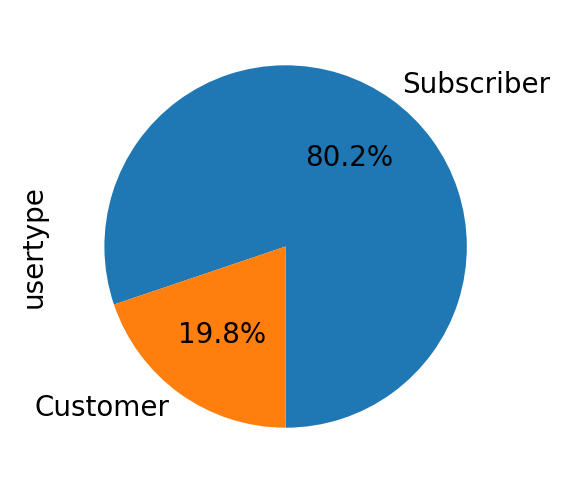

In [ ]:
fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)
df['usertype'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=10)

New feature generation for the classification

In [ ]:
df['Start Date'] = pd.to_datetime(df['starttime'])
df['Stop Date'] = pd.to_datetime(df['stoptime'])

In [ ]:

df['Start Day'] = df['Start Date'].dt.day
df['Start Minute'] = df['Start Date'].dt.minute


df['Start Weekofyear'] = df['Start Date'].dt.weekofyear
df['Start Weekday'] = df['Start Date'].dt.weekday
df['Start dayofyear'] = df['Start Date'].dt.dayofyear

df['Start Hour'] = df['Start Date'].dt.hour


df['is_weekend'] = df['Start Weekday'].apply(lambda d: d==5 or d==6)
df.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,age,gender,distance,is_roundtrip,Start Date,Stop Date,Start Day,Start Minute,Start Weekofyear,Start Weekday,Start dayofyear,Start Hour,is_weekend
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,Broadway & Berry St,Classon Ave & St Marks Ave,37512,Customer,32,2,3.802252,False,2020-06-01 00:00:09.614,2020-06-01 00:17:06.833,1,0,23,0,153,0,False
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,E 53 St & Lexington Ave,E 17 St & Broadway,21093,Customer,23,2,2.871175,False,2020-06-01 00:00:21.255,2020-06-01 00:24:18.965,1,0,23,0,153,0,False
5,355,2020-06-01 00:00:22.6500,2020-06-01 00:06:18.5250,Laight St & Hudson St,Perry St & Bleecker St,39594,Subscriber,30,1,1.520738,False,2020-06-01 00:00:22.650,2020-06-01 00:06:18.525,1,0,23,0,153,0,False
7,1810,2020-06-01 00:00:27.5880,2020-06-01 00:30:38.2560,Cooper Square & Astor Pl,E 16 St & 5 Ave,16571,Customer,25,2,0.872390,False,2020-06-01 00:00:27.588,2020-06-01 00:30:38.256,1,0,23,0,153,0,False
8,87,2020-06-01 00:00:48.8500,2020-06-01 00:02:16.0190,Duffield St & Willoughby St,Bond St & Fulton St,28205,Subscriber,49,2,0.306852,False,2020-06-01 00:00:48.850,2020-06-01 00:02:16.019,1,0,23,0,153,0,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386958 entries, 2 to 1882272
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   tripduration        1386958 non-null  int64         
 1   starttime           1386958 non-null  object        
 2   stoptime            1386958 non-null  object        
 3   start station name  1386958 non-null  object        
 4   end station name    1386958 non-null  object        
 5   bikeid              1386958 non-null  int64         
 6   usertype            1386958 non-null  object        
 7   age                 1386958 non-null  int64         
 8   gender              1386958 non-null  int64         
 9   distance            1386958 non-null  float64       
 10  is_roundtrip        1386958 non-null  bool          
 11  Start Date          1386958 non-null  datetime64[ns]
 12  Stop Date           1386958 non-null  datetime64[ns]
 13  Start Day   

create a new column called usertype_label as dependent varialbe, 0 for customer, 1 for subscriber

In [ ]:

df = df[['tripduration', 'is_weekend', 'age', 
       'Start Day', 'Start Minute',
       'Start Weekofyear', 
       'Start dayofyear', 'Start Hour','Start Weekday', 'gender','distance','usertype']]
df['usertype_label']=(df['usertype']== 'Subscriber') *1 
df['usertype_label'].unique()
df.head(5)

,tripduration,is_weekend,age,Start Day,Start Minute,Start Weekofyear,Start dayofyear,Start Hour,Start Weekday,gender,distance,usertype,usertype_label
2,1017,False,32,1,0,23,153,0,0,2,3.802252,Customer,0
4,1437,False,23,1,0,23,153,0,0,2,2.871175,Customer,0
5,355,False,30,1,0,23,153,0,0,1,1.520738,Subscriber,1
7,1810,False,25,1,0,23,153,0,0,2,0.872390,Customer,0
8,87,False,49,1,0,23,153,0,0,2,0.306852,Subscriber,1


generate heat map and correlation matrix for feature selection, As a result, variables trip duration, age, Start Hour, Start Weekday, gender and distance were chosen as features.


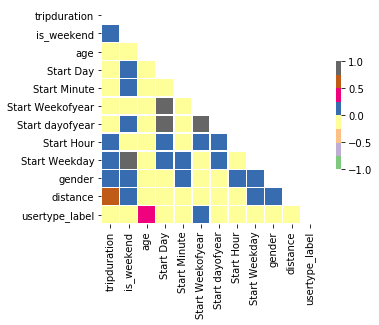

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

# Compute the correlation matrix
corr = df[['tripduration', 'is_weekend', 'age', 
       'Start Day', 'Start Minute',
       'Start Weekofyear', 
       'Start dayofyear', 'Start Hour','Start Weekday', 'gender','distance','usertype_label']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap = 'Accent',vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [ ]:
corr = df[['tripduration', 'is_weekend', 'age', 
       'Start Day', 'Start Minute',
       'Start Weekofyear', 
       'Start dayofyear', 'Start Hour','Start Weekday', 'gender','distance','usertype_label']].corr()
corr

,tripduration,is_weekend,age,Start Day,Start Minute,Start Weekofyear,Start dayofyear,Start Hour,Start Weekday,gender,distance,usertype_label
tripduration,1.000000,0.088518,-0.090860,-0.029585,-0.008232,-0.047456,-0.029585,0.073472,0.074906,0.104986,0.671605,-0.183551
is_weekend,0.088518,1.000000,-0.054931,0.029329,0.003314,-0.168497,0.029329,-0.009956,0.801002,0.029627,0.040844,-0.087492
age,-0.090860,-0.054931,1.000000,-0.021027,-0.001466,-0.008943,-0.021027,-0.099944,-0.047409,-0.080893,-0.074668,0.276752
Start Day,-0.029585,0.029329,-0.021027,1.000000,-0.006856,0.969269,1.000000,0.039958,0.045773,-0.006909,-0.005760,-0.001441
Start Minute,-0.008232,0.003314,-0.001466,-0.006856,1.000000,-0.007836,-0.006856,-0.048510,0.004521,0.000124,-0.008958,-0.000798
Start Weekofyear,-0.047456,-0.168497,-0.008943,0.969269,-0.007836,1.000000,0.969269,0.041526,-0.201377,-0.013655,-0.014779,0.017346
Start dayofyear,-0.029585,0.029329,-0.021027,1.000000,-0.006856,0.969269,1.000000,0.039958,0.045773,-0.006909,-0.005760,-0.001441
Start Hour,0.073472,-0.009956,-0.099944,0.039958,-0.048510,0.041526,0.039958,1.000000,-0.009522,0.007274,-0.012271,-0.070806
Start Weekday,0.074906,0.801002,-0.047409,0.045773,0.004521,-0.201377,0.045773,-0.009522,1.000000,0.027940,0.037079,-0.076174
gender,0.104986,0.029627,-0.080893,-0.006909,0.000124,-0.013655,-0.006909,0.007274,0.027940,1.000000,0.032841,-0.080347


In [ ]:
df.columns

Index(['tripduration', 'is_weekend', 'age', 'Start Day', 'Start Minute',
       'Start Weekofyear', 'Start dayofyear', 'Start Hour', 'Start Weekday',
       'gender', 'distance', 'usertype', 'usertype_label'],
      dtype='object')

Resampling(under sample) to generate balanced dataset

In [ ]:
from sklearn.utils import resample

In [ ]:
subscriber_sample = df[df['usertype_label']==1]
customer_sample=df[df['usertype_label']==0]

In [ ]:
subscriber_downsampled= resample(subscriber_sample,replace=False,n_samples=len(customer_sample),random_state=27)

In [ ]:
down_samples=pd.concat([subscriber_downsampled,customer_sample])
len(down_samples)

549528

after resampling , the two category has the same number of records(histogram shown)

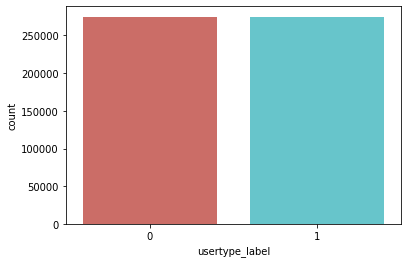

In [ ]:
sns.countplot(x="usertype_label",data=down_samples,palette="hls")
plt.show()

train test split and distribution check

In [ ]:
metrics_name = ['tripduration','age', 'Start Hour', 'Start Weekday','gender','distance']
targets_name = ['usertype_label']
metrics=pd.DataFrame(down_samples,columns=metrics_name)
target=pd.DataFrame(down_samples,columns=targets_name)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(metrics,target,test_size=0.25,random_state=0)

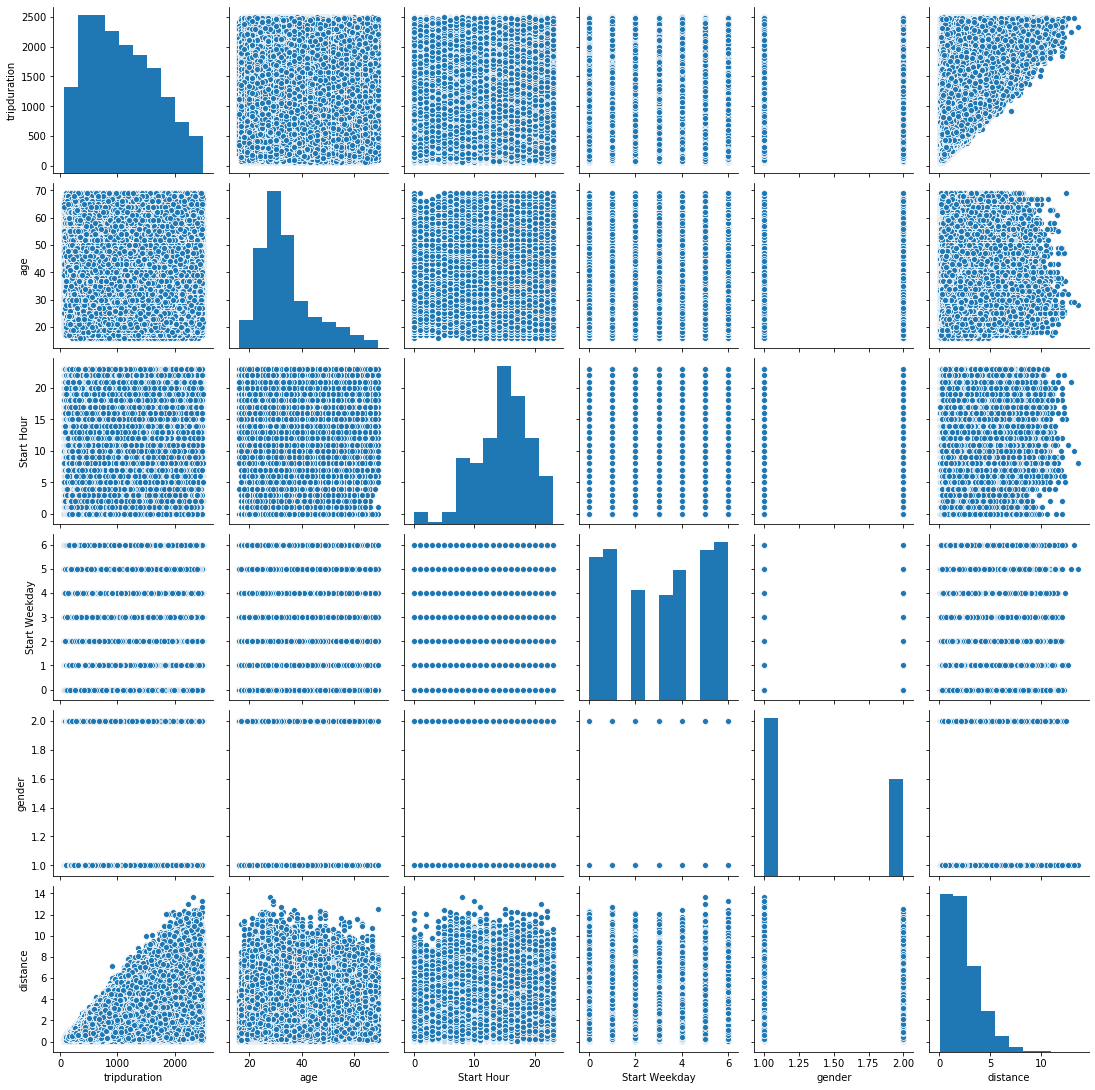

In [ ]:
sns.pairplot(metrics)

since the distribution of age, trip duration and distance are right skewed, boxcox transformation is needed for logistic regression and naive bayes. Below is the process for calculating the lambda, which will be used later

In [ ]:
from scipy.stats import boxcox


In [ ]:
bc_x1,labda=boxcox(metrics['tripduration']) ##lambda for tripduration is around 0.5--log transformation
labda

0.513821306494073

In [ ]:
bc_x2,labda=boxcox(metrics['age']) ## lambda for age is -0.68
labda

-0.6836333826489988

In [ ]:
bc_x3,labda=boxcox(metrics['distance']) ##lambda for distance is 0.27
labda
    

0.2745924498235867

In [ ]:
metrics.head(5)

,tripduration,age,Start Day,Start Minute,Start Hour,Start Weekday,gender,distance
2,1017,32,1,0,0,0,2,3.802252
4,1437,23,1,0,0,0,2,2.871175
5,355,30,1,0,0,0,1,1.520738
7,1810,25,1,0,0,0,2,0.872390
8,87,49,1,0,0,0,2,0.306852


In [ ]:
X_train.describe()

,tripduration,age,Start Day,Start Minute,Start Hour,Start Weekday,gender,distance
count,1.040218e+06,1.040218e+06,1.040218e+06,1.040218e+06,1.040218e+06,1.040218e+06,1.040218e+06,1.040218e+06
mean,9.922416e+02,3.638726e+01,1.652162e+01,2.953027e+01,1.442637e+01,2.946024e+00,1.352916e+00,2.233437e+00
std,6.066454e+02,1.128254e+01,8.253255e+00,1.725691e+01,4.568377e+00,2.072400e+00,4.778772e-01,1.628682e+00
min,6.100000e+01,1.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.350374e-02
25%,4.850000e+02,2.800000e+01,1.000000e+01,1.500000e+01,1.100000e+01,1.000000e+00,1.000000e+00,1.004513e+00
50%,8.740000e+02,3.300000e+01,1.700000e+01,3.000000e+01,1.500000e+01,3.000000e+00,1.000000e+00,1.802516e+00
75%,1.429000e+03,4.300000e+01,2.400000e+01,4.400000e+01,1.800000e+01,5.000000e+00,2.000000e+00,3.075658e+00
max,2.490000e+03,6.900000e+01,3.000000e+01,5.900000e+01,2.300000e+01,6.000000e+00,2.000000e+00,1.406407e+01


In [ ]:
y_test.describe()

,usertype_label
count,346740.000000
mean,0.801719
std,0.398706
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
from sklearn.model_selection import cross_val_score

normalization for KNN model

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_knn = scaler.transform(X_train)
X_test_knn = scaler.transform(X_test)
metrics_nor =scaler.transform(metrics)

In [ ]:
metrics_nor

array([[ 1.15475905e+00,  1.88390638e-01,  5.15161341e-01,
         9.24365674e-01,  1.27260663e+00, -1.16404202e+00],
       [ 9.34711453e-03,  1.70820464e+00, -5.89179560e-01,
        -3.13284754e-02,  1.27260663e+00,  1.91442008e-01],
       [-1.06368000e-01,  5.68344139e-01, -1.03091592e+00,
         1.40221275e+00, -7.85788771e-01,  1.89202400e-01],
       ...,
       [-6.58111085e-01, -6.66504739e-01,  1.84037042e+00,
        -9.87022625e-01,  1.27260663e+00, -1.30703564e-01],
       [-1.07066062e+00, -1.58611268e-03,  1.84037042e+00,
        -9.87022625e-01, -7.85788771e-01, -8.27207842e-01],
       [-1.08072281e+00, -3.81539614e-01,  1.84037042e+00,
        -9.87022625e-01, -7.85788771e-01, -1.09455317e+00]])

use 10-fold cross validation on training set to find the best k for knn; maximum set to 80

In [ ]:
# creating odd list of K for KNN
neighbors = list(range(1, 80, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_knn, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

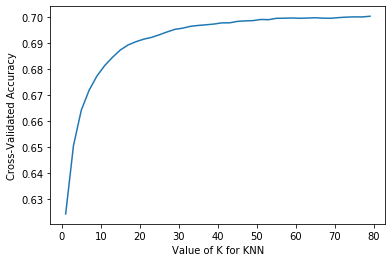

In [ ]:
plt.plot(neighbors, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

maximum set to 100 but failed due to limit memory space

In [ ]:
# creating odd list of K for KNN
neighbors_new = list(range(1, 100, 2))

# empty list that will hold cv scores
cv_scores_new = []

# perform 10-fold cross validation
for k in neighbors_new:
    knn_new = KNeighborsClassifier(n_neighbors=k)
    scores_new = cross_val_score(knn, X_train_knn, y_train, cv=10, scoring='accuracy')
    cv_scores_new.append(scores_new.mean())

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\15514\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
cv_scores

[0.6243370273523328,
 0.6505752939826667,
 0.6641457414680273,
 0.6718201977362989,
 0.6772600275676643,
 0.6813095595504063,
 0.6844856212518545,
 0.6872855928007748,
 0.6892363570794411,
 0.6904713533485926,
 0.6914515866477992,
 0.6921285328388469,
 0.6931378909351456,
 0.6942345906905569,
 0.6952196775927749,
 0.6956806812194458,
 0.6963867422584207,
 0.6967288515382714,
 0.6969763326613643,
 0.6972577827063626,
 0.6977115059579515,
 0.697726066766986,
 0.6982719919919701,
 0.698485505959282,
 0.6985801322321739,
 0.6990144468410551,
 0.6989343739006062,
 0.699458460531789,
 0.6994997055312077,
 0.699591906268316,
 0.6994730171609969,
 0.6995652168384308,
 0.6996719742636177,
 0.6995191150569775,
 0.699490001150983,
 0.6997399152275803,
 0.6999194642762016,
 0.7000092400662341,
 0.6999898278324077,
 0.7002567214836813]

The optimal number of neighbors is 79


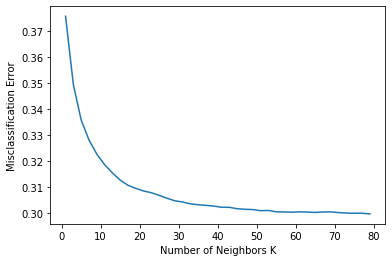

In [ ]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

build knn model, generate confusion matrix and classification report

In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors=79,metric='minkowski',p=2,weights='distance')

In [ ]:
KNN_classifier.fit(X_train_knn,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=79, p=2,
                     weights='distance')

In [ ]:
predictions_knn=KNN_classifier.predict(X_test_knn)

In [ ]:
confusion_matrix(y_test,predictions_knn)

array([[51337, 17546],
       [23477, 45022]], dtype=int64)

In [ ]:
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.69      0.75      0.71     68883
           1       0.72      0.66      0.69     68499

    accuracy                           0.70    137382
   macro avg       0.70      0.70      0.70    137382
weighted avg       0.70      0.70      0.70    137382



generate roc-auc curve

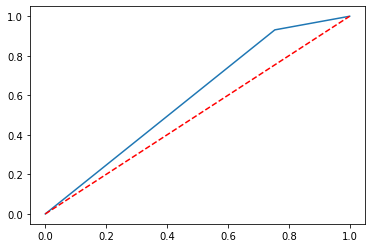

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,predictions_knn)
plt.plot(fpr,tpr)
plt.plot([0,1],"r--")
plt.show()

copy the metric(feature set), and make transformation based on lambda calculated before for naive bayes and logistic regression

In [ ]:
metric_nblg = metrics.copy()

In [ ]:
metric_nblg['tripduration']=boxcox(metric_nblg['tripduration'],0.5)
metric_nblg['age']=boxcox(metric_nblg['age'],-0.68)
metric_nblg['distance']=boxcox(metric_nblg['distance'],0.27)

In [ ]:
X_train_nl,X_test_nl,y_train_nl,y_test_nl = train_test_split(metric_nblg,target,test_size=0.25,random_state=0)

build naive bayes model, generate confusion matrix, classification report and roc-auc curve

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
classifier_NB =GaussianNB()
classifier_NB.fit(X_train_nl,y_train_nl.values.ravel())
y_pred=classifier_NB.predict(X_test_nl)

In [ ]:
y_pred=classifier_NB.predict(X_test_nl)

In [ ]:
confusion_matrix(y_test_nl,y_pred)

array([[51304, 17579],
       [25257, 43242]], dtype=int64)

In [ ]:
print(classification_report(y_test_nl,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71     68883
           1       0.71      0.63      0.67     68499

    accuracy                           0.69    137382
   macro avg       0.69      0.69      0.69    137382
weighted avg       0.69      0.69      0.69    137382



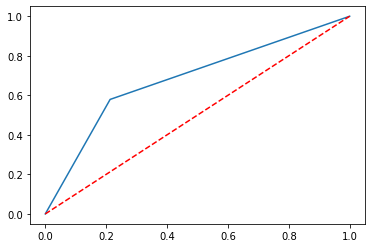

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],"r--")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from sklearn.tree import export_graphviz

import pydotplus

In [ ]:
max_depth_range = list(range(1,19))

use gridsearch and also plot the accuracy plot(10-fold cross validation on training set) to determine the best max depth value

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [ ]:
parameters = {'max_depth':range(1,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=metrics, y=target)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.6899921486065821 {'max_depth': 10}


In [ ]:
accu = []
for i in range(1,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, n_jobs=4)
    accu.append(scores.mean())


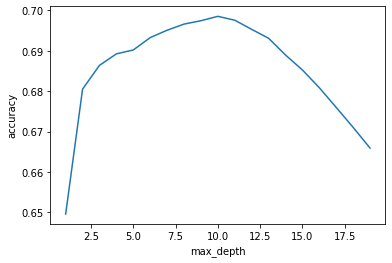

In [ ]:
plt.plot(range(1,20),accu)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

build decision tree model, generate confusion matrix, classification report and roc-auc curve

In [ ]:
classifier_DT =DecisionTreeClassifier(max_depth=10,random_state=0)
classifier_DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred=classifier_DT.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[52214 16669]
 [24846 43653]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72     68883
           1       0.72      0.64      0.68     68499

    accuracy                           0.70    137382
   macro avg       0.70      0.70      0.70    137382
weighted avg       0.70      0.70      0.70    137382



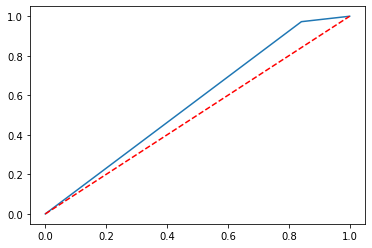

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],"r--")
plt.show()

In [ ]:
tree_roc_auc = roc_auc_score(y_test,y_pred)
print(tree_roc_auc)

0.5655397686210968


generate feature importance for the tree model

In [ ]:
importances = pd.DataFrame({'feature': X_train.columns,'importance':np.round(classifier_DT.feature_importances_,3)})
importances= importances.sort_values('importance',ascending=False)
print(importances)

         feature  importance
1            age       0.577
0   tripduration       0.291
5       distance       0.061
3  Start Weekday       0.030
2     Start Hour       0.029
4         gender       0.012


build logistic model, generate confusion matrix, classification report and roc-auc curve

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train_nl, y_train_nl)

C:\Users\15514\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Predictions = logmodel.predict(X_test_nl)

In [ ]:
print(classification_report(y_test_nl,Predictions))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70     68883
           1       0.70      0.67      0.68     68499

    accuracy                           0.69    137382
   macro avg       0.69      0.69      0.69    137382
weighted avg       0.69      0.69      0.69    137382



In [ ]:
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70     68883
           1       0.70      0.67      0.68     68499

    accuracy                           0.69    137382
   macro avg       0.69      0.69      0.69    137382
weighted avg       0.69      0.69      0.69    137382



In [ ]:
print(confusion_matrix(y_test,Predictions))

[[  6073  62679]
 [  5364 272624]]


In [ ]:
logmodel.score(metrics,target)

0.5005532020206431

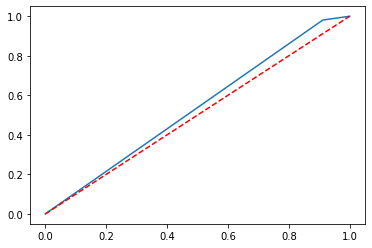

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,Predictions)
plt.plot(fpr,tpr)
plt.plot([0,1],"r--")
plt.show()